## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

          0         1         2         3         4         5         6  \
0  1.000000  0.267553  0.708787  0.623246  0.163817 -0.478790  0.370375   
1  0.267553  1.000000 -0.023757  0.018087 -0.353220 -0.591091 -0.029257   
2  0.708787 -0.023757  1.000000  0.636840  0.499153 -0.501707  0.018825   
3  0.623246  0.018087  0.636840  1.000000 -0.131958 -0.297681 -0.017769   
4  0.163817 -0.353220  0.499153 -0.131958  1.000000  0.134504  0.349856   
5 -0.478790 -0.591091 -0.501707 -0.297681  0.134504  1.000000  0.419067   
6  0.370375 -0.029257  0.018825 -0.017769  0.349856  0.419067  1.000000   
7  0.099995  0.746475 -0.225267 -0.303674 -0.059726 -0.285361  0.336639   
8  0.386892  0.079695 -0.016640  0.227444 -0.279622 -0.343686  0.100154   
9 -0.053821  0.469468 -0.214503 -0.476462 -0.223015 -0.517735 -0.126623   

          7         8         9  
0  0.099995  0.386892 -0.053821  
1  0.746475  0.079695  0.469468  
2 -0.225267 -0.016640 -0.214503  
3 -0.303674  0.227444 -0.476462  
4 -0

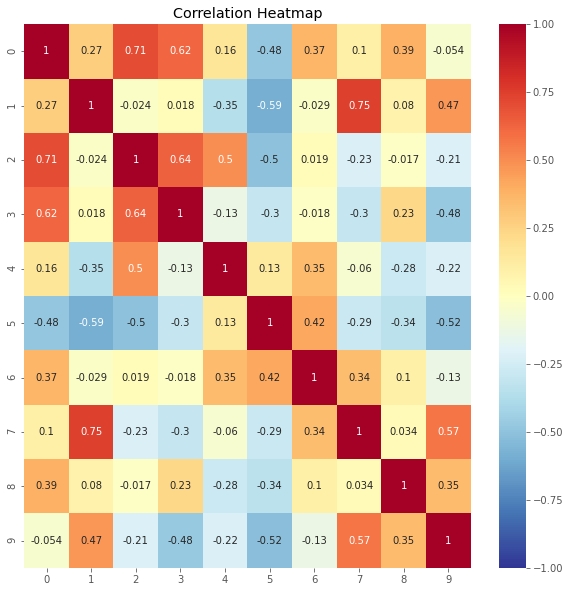

In [3]:
#Q: 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap

matrix = (np.random.random((10,10)) - 0.5) * 2

plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap');

# 找出 Correlation 值
ext_data_corrs = pd.DataFrame(matrix).corr()
print(ext_data_corrs)

#cmap is for selecting  a specific colormap
heatmap = sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = +1)
plt.show()

[[ 0.42766042 -0.28176388  0.98521168]
 [ 0.57260341 -0.6328056   0.01633863]
 [-0.02359414 -0.36104659 -0.49961719]
 ...
 [ 0.29083789 -0.93804264 -0.02577468]
 [ 0.3266263   0.01425775 -0.8856838 ]
 [-0.98029745  0.74262249  0.68242251]]


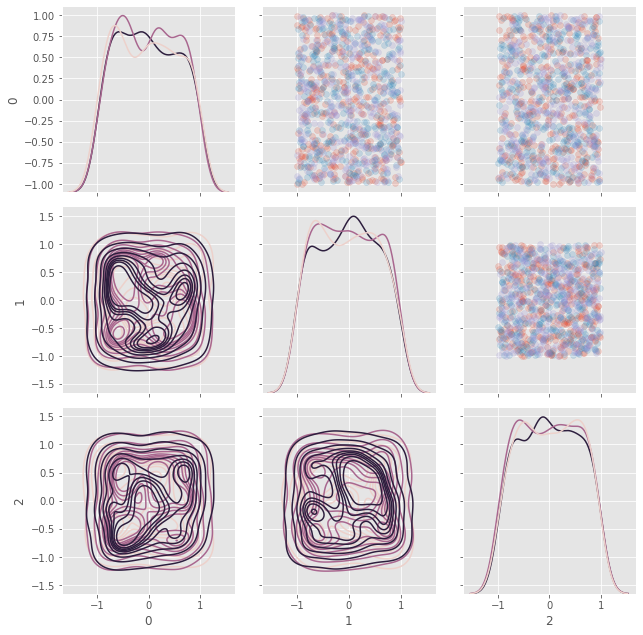

In [4]:
# Q: 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot 
# (上半部為 scatter, 對角線為 hist, 下半部為 density)

nrow = 1000
ncol = 3

matrix = (np.random.random((nrow,ncol)) - 0.5)*2
print (matrix)

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()



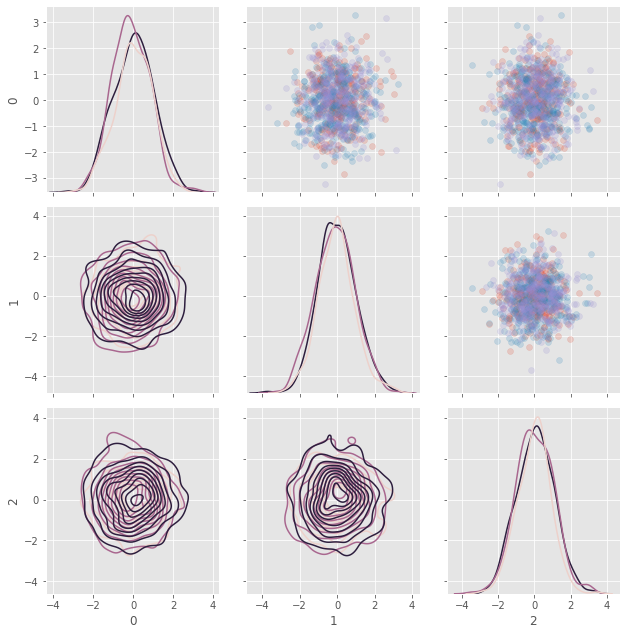

In [5]:
#用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot 
#(上半部為 scatter, 對角線為 hist, 下半部為 density)

nrow = 1000
ncol = 3

matrix = np.random.randn(nrow * ncol).reshape((nrow, ncol))

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()